### Getting Started

In this project, we will evaluate the performance and predictive power of a model that has been trained and tested on data collected from homes in suburbs of Boston, Massachusetts. A model trained on this data that is seen as a good fit could then be used to make certain predictions about a home — in particular, its monetary value. This model would prove to be invaluable for someone like a real estate agent who could make use of such information on a daily basis.
The dataset for this project originates from the UCI Machine Learning Repository. The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. 

In [3]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from sklearn.cross_validation import ShuffleSplit

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Boston housing dataset
data = pd.read_csv('housing.csv')
prices = data['MEDV']
features = data.drop('MEDV', axis = 1)

print ("Boston housing dataset has {} data points with {} variables each.".format(*data.shape))

Boston housing dataset has 489 data points with 4 variables each.


### Data Exploration

Since the main goal of this project is to construct a working model which has the capability of predicting the value of houses, we will need to separate the dataset into features and the target variable. The features, 'RM', 'LSTAT', and 'PTRATIO', give us quantitative information about each data point. The target variable, 'MEDV', will be the variable we seek to predict. These are stored in features and prices, respectively.

In [4]:
print ("Statistics for Boston housing dataset:\n")

minimum_price = np.min(prices)

maximum_price = np.max(prices)

mean_price = np.mean(prices)

median_price = np.median(prices)

std_price = np.std(prices)

print ("Minimum price: ${:,.2f}".format(minimum_price))
print ("Maximum price: ${:,.2f}".format(maximum_price))
print ("Mean price: ${:,.2f}".format(mean_price))
print ("Median price ${:,.2f}".format(median_price))
print ("Standard deviation of prices: ${:,.2f}".format(std_price))

Statistics for Boston housing dataset:

Minimum price: $105,000.00
Maximum price: $1,024,800.00
Mean price: $454,342.94
Median price $438,900.00
Standard deviation of prices: $165,171.13


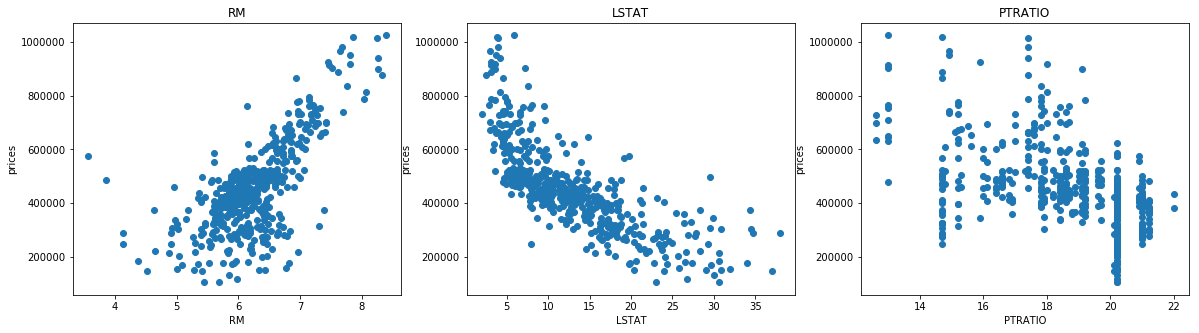

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 5))

for i, col in enumerate(features.columns):
    plt.subplot(1, 3, i + 1)
    plt.plot(data[col], prices, 'o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('prices')

### Feature Observation

The three features we are looking at are 'RM', 'LSTAT', and 'PTRATIO'

'RM' is the average number of rooms among homes in the neighborhood.
'LSTAT' is the percentage of homeowners in the neighborhood considered "lower class" (working poor).
'PTRATIO' is the ratio of students to teachers in primary and secondary schools in the neighborhood.

1) Intuitively, I can assume that if the average number of rooms is higher the cost will be higher for that particular neighbourhood. Although the prices can differ depending on where the house is located, i.e. which neighbourhood it is located.

2) If the neighbouthhod has high percentage of homeowners, one can think that the prices will drop down, since the people aren't wealthy enough to own a high priced house. 

3) The ratio tells me how many students are there per teacher, but that doesn't tell me how many students are there in that neighborhood or teachers too. A community might have focused education where the teachers teach less amount of students in her class, which can be afforded by only rich people. On the other hand, if it were a university were the ratio is higher, the prices would still be high as it is a known fact that owners like to rip of students :p. The prices surge high near universities, i.e. densely populated by students.

### Define the Performance Metric

For this project, we will be calculating the coefficient of determination, R2, to quantify your model's performance. The coefficient of determination for a model is a useful statistic in regression analysis, as it often describes how "good" that model is at making predictions.


In [108]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    # Return the score
    return score

### Goodness of Fit



In [109]:
# Calculate the performance of this model
score = performance_metric([3, -0.5, 2, 7, 4.2], [2.5, 0.0, 2.1, 7.8, 5.3])
print ("Model has a coefficient of determination R^2 = {:.3f}.".format(score))

Model has a coefficient of determination R^2 = 0.923.


Testing the function with the above function on dataset of 5 points gives us a values of 0.923. Since the value of R2 is high we can say that it captures the variation (mostly) of the target variable. We can infer that the variable explains the target variable to a good amount. Having said that, we have to remember that correlation doesn't imply causation. Also, I would like to clarify that this value will tell us how well our model has fit our training data and won't tell us how well it will perform on the test data.

### Shuffle and Split Data

In [110]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, prices, random_state = 1, train_size = 0.7)

print('Number of rows in the total set: {}'.format(data.shape[0]))
print('Number of rows in the training set: {}'.format(X_train.shape[0]))
print('Number of rows in the test set: {}'.format(X_test.shape[0]))

Number of rows in the total set: 489
Number of rows in the training set: 342
Number of rows in the test set: 147


We need to split data, to evaluate our model so that it doesn't overfit (high variance) or underfit (high bias) the data. It would help us determine if our model has been processed properly or not.

### Analyzing Model Performance

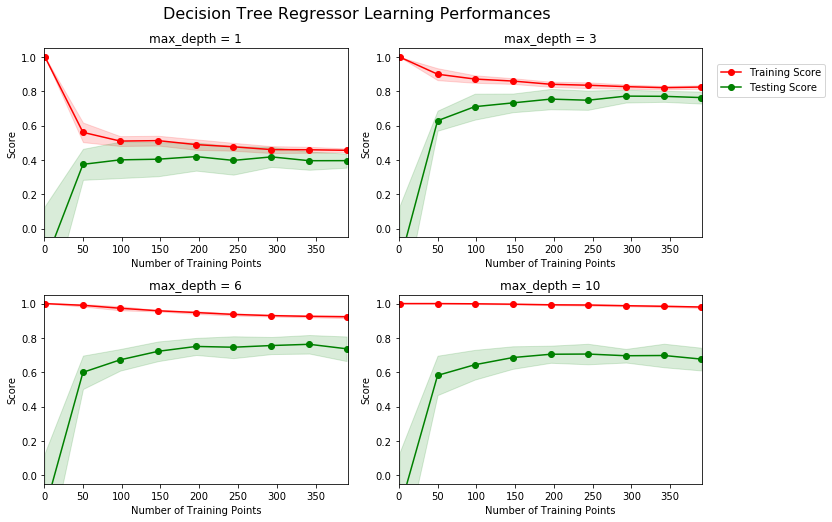

In [111]:
# Produce learning curves for varying training set sizes and maximum depths
vs.ModelLearning(features, prices)

Each graph visualizes the learning curves of the model for both training and testing as the size of the training set is increased. Note that the shaded region of a learning curve denotes the uncertainty of that curve (measured as the standard deviation). The model is scored on both the training and testing sets using R2, the coefficient of determination.


### Learning the Data

Looking at max_depth = 3 graph (top right), we have two curves traing and tescting scores. As more data points are added, the curves will continue to converge and move into the same direction. Adding more data points wouldn't benefit the model as it has enough points to train with. The errors would stay constant throughout. A con would be that if we add more points, we won't have enough points for validation and for testing. A pro would be that the model will learn the data better and keep looking out for new patterns.

For better evaluation of models we will have to use cross validation data instead of testing data. We can't break the golden rule!

### Complexity Curves

The following graph is for a decision tree model that has been trained and validated on the training data using different maximum depths. The graph produces two complexity curves — one for training and one for validation. Similar to the learning curves, the shaded regions of both the complexity curves denote the uncertainty in those curves, and the model is scored on both the training and validation sets using the performance_metric function.

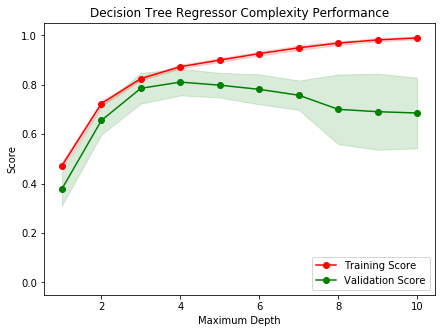

In [112]:
vs.ModelComplexity(X_train, y_train)

### Bias-Variance Tradeoff

When the model is trained with a maximum depth of 1, the model underfits and suffers from high bias. This can intuitively also be explained as you have one branch from your parent node, you can't expect your algorithm to explain a whole lot from it. Whereas with a depth of 10, the model suffers from high variance trying to memorize the data, rather than learning from it. Visually you can see that the validation score keeps reducing after max depth 4 and starts deviating away from the training score. In turn the validation error keeps rising and doesn't come close to the training error, thus overfitting the data while training. Initially since the training and validation scores are low, or in other words since their errors are high although close to each other, it shows that the model isn't making much sense of the data and hasn't generalized it well yet which makes it a bad choice for your model. 

### Best-Guess Optimal Model

From the graph above we can conclude that the max depth of 3 would be the ideal way to go as the difference in errors isn't that high between validation and training thus making it the optimal number to choose. If we go left, we underfit and if we go right we overfit

## Evaluating Model Performance

### Grid Search

For one particular algorithm a user would find it beneficial by running through all sorts of combinations available to find the what values of the hyperparameters would be useful and what wouldn't. That's precisely grid search, one would run through a combinaton of all possible values (like in a grid) and find the combination for a model that has a higher accuracy/f1 score. This would give us an optimal solution (values to hyperparameters) for a single algorithm.

### Cross-Validation

K-fold cross validation a technique in which you break your training data into k folds. Each time it trains, it will have k-1 folds of training data and 1 fold as testing data. This will be done k times, averaging later to give us our final model.K- fold cross validation technique helps increase our training set by keeping the model away from overfitting. While doing the grid search, it is incorrect to use our test data to finalize our results. We want it later to validate our values. In that case CV helps, by always keeping a set of training data as test data and shuffling them around each time, thus reducing the risk of overfitting.

### Fitting a Model

To ensure that we are producing an optimized model, we will train the model using the grid search technique to optimize the 'max_depth' parameter for the decision tree. 

The ShuffleSplit() implementation below will create 10 ('n_splits') shuffled sets, and for each shuffle, 20% ('test_size') of the data will be used as the validation set.

In [113]:
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.grid_search import GridSearchCV

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Creating cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.20, random_state = 0)

    # Creating a decision tree regressor object
    regressor = DecisionTreeRegressor(min_samples_split = 3, min_samples_leaf = 2)

    # Creating a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth':np.arange(1,11,1)}

    # Transforming 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # grid search cv object 
    grid = GridSearchCV(estimator = regressor, param_grid = params, scoring = scoring_fnc, cv = cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

## Making Predictions
Once a model has been trained on a given set of data, it can now be used to make predictions on new sets of input data. In the case of a decision tree regressor, the model has learned what the best questions to ask about the input data are, and can respond with a prediction for the target variable. You can use these predictions to gain information about data where the value of the target variable is unknown — such as data the model was not trained on.
### Optimal Model

In [114]:
# Fit the training data to the model using grid search
reg = fit_model(X_train, y_train)

# Produce the value for 'max_depth'
print ("Parameter 'max_depth' is {} for the optimal model.".format(reg.get_params()['max_depth']))

Parameter 'max_depth' is 4 for the optimal model.


I had guessed it would have been at 3 mainly because the graph starts to split after that and the data might have slightly over fit at 4. Also the difference in errors at 3 and 4 are marginally different from one another. After CV and tesing it out multiple times, I guess my guess was incorrect. :p

### Predicting Selling Prices


In [115]:
# Produce a matrix for client data
client_data = [[5, 17, 15], # Client 1
               [4, 32, 22], # Client 2
               [8, 3, 12]]  # Client 3

# Show predictions
for i, price in enumerate(reg.predict(client_data)):
    print ("Predicted selling price for Client {}'s home: ${:,.2f}".format(i+1, price))

Predicted selling price for Client 1's home: $412,300.00
Predicted selling price for Client 2's home: $229,568.18
Predicted selling price for Client 3's home: $937,230.00


In [116]:
from scipy import stats

print("The stats of the number of rooms is {}".format(stats.describe(data['RM'])))

The stats of the number of rooms is DescribeResult(nobs=489, minmax=(3.5610000000000004, 8.3979999999999997), mean=6.2402883435582828, variance=0.41428501709745552, skewness=0.0813148648441299, kurtosis=1.8555056434482688)


In [117]:
print("The stats of the ratio of students to teachers is {}".format(stats.describe(data['PTRATIO'])))

The stats of the ratio of students to teachers is DescribeResult(nobs=489, minmax=(12.6, 22.0), mean=18.516564417177911, variance=4.4574504676656934, skewness=-0.8180584260749316, kurtosis=-0.191337878678147)


In [118]:
print("The stats of the % of lower status people is {}".format(stats.describe(data['LSTAT'])))

The stats of the % of lower status people is DescribeResult(nobs=489, minmax=(1.98, 37.969999999999999), mean=12.939631901840491, variance=50.154579372422809, skewness=0.9027806590167046, kurtosis=0.4765032632388091)


From my given stats, I would have predicted the same values I got from the model. The mean and median are around the $450k mark, so an average home such as the client 1's house would have been around that mark. I wouldn't have expected it to be too different for the other two clients too. Although from all of this I now want to know which variable explains my predictions best, i.e. which variables are important in a deciding factor for my house predictions

### Applicability

Should or should we not use the constructed model in a real-world setting?

Below is a small trial in which ten times with different training and testing sets we see how the prediction for a specific client changes with respect to the data it's trained on.

In [119]:
vs.PredictTrials(features, prices, fit_model, client_data)

Trial 1: $391,183.33
Trial 2: $411,417.39
Trial 3: $415,800.00
Trial 4: $420,622.22
Trial 5: $389,025.00
Trial 6: $411,931.58
Trial 7: $399,663.16
Trial 8: $407,232.00
Trial 9: $402,531.82
Trial 10: $413,700.00

Range in prices: $31,597.22


The question arises if we can use inflated prices, the feature 'MEDV' has been multiplicatively scaled to account for 35 years of market inflation, from 1978 for current real world scenarios. Since the target variable has been already manipulated to fit the real world scenario I don't see any harm in using the prices manipulated in our model. Although having the current data would have been better. Inflation definetly counts as an important factor as evidenced by the rise in tuition fees, wages, housing costs, car costs over the past 100 years. 

People's financial ability to buy houses also has to be considered in making the model. Definetly we would need more features to describe our model, simply using just 3 parameters won't be that effective. Now a days people look for much more than just bedrooms and schools. Factors like quality of apppliances in the home, square feet of the plot area, presence of pool etc should factor in. 

I wouldn't say that our model is robust is enough to make consistent predictions. I would like the variability (above range, \$31k ) to drop even more and keep it in the range of \$10k i.e., +/- \$5k, mainly because thinking of it logically, no one would like to pay \$31k more for the same house and conditions. We'll have to narrow it down to something reasonable. 

Even when we build a model for Boston, it can arguably be applied to other major cities, like NYC, Seattle, D.C., San Francisco or the Bay Area. But it won't be applicable to rural areas, simply because the living conditions, wages, growth are completly different than those compared to urban cities.

Also, it won't be fair to judge the price of an individual home just based on the characteristics of the entire neighborhood. An individual home might sometimes offer more than what one would expect from that particular neighborhood in general.